In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
sns.set_style("whitegrid")
#baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
#eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 11 }
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv("filled_scout_20200923.csv")

In [4]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

In [5]:
def fill_most(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond][col_name].mode()[0])
        else:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [6]:
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [7]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if (mode1 != []) and (mode2 != []):
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].mode()[0]).fillna(df[cond1][col_name].mode()[0])
                elif mode1 != []:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond1][col_name].mode()[0])
                else:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [8]:
df.shape

(15919, 127)

In [9]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,make_model,body_type,price,vat,km,Type,Cylinders,Fuel,Gears,Comfort&Convenience,Entertainment&Media,Extras,Safety&Security,Previous_Owners,hp_kW,Inspection_new,age,Body_Color,Paint_Type,Upholstery_type,Nr_of_Doors,Nr_of_Seats,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cons_city,cons_country,CO2_Emission,Emission_Class,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,...,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
0,0,0,Audi A1,Sedans,15770,VAT deductible,56013.00,Used,3.00,Diesel,6.00,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system","Bluetooth,Hands-free equipment,On-board computer,Radio","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",2.00,66.00,1,3.00,Black,Metallic,Cloth,5.00,5.00,Automatic,1422.00,1220.00,front,3.80,4.30,3.50,99.00,Euro 6,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1


In [10]:
list(df.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'make_model',
 'body_type',
 'price',
 'vat',
 'km',
 'Type',
 'Cylinders',
 'Fuel',
 'Gears',
 'Comfort&Convenience',
 'Entertainment&Media',
 'Extras',
 'Safety&Security',
 'Previous_Owners',
 'hp_kW',
 'Inspection_new',
 'age',
 'Body_Color',
 'Paint_Type',
 'Upholstery_type',
 'Nr_of_Doors',
 'Nr_of_Seats',
 'Gearing_Type',
 'Displacement_cc',
 'Weight_kg',
 'Drive_chain',
 'cons_comb',
 'cons_city',
 'cons_country',
 'CO2_Emission',
 'Emission_Class',
 'cc_Air conditioning',
 'cc_Air suspension',
 'cc_Armrest',
 'cc_Automatic climate control',
 'cc_Auxiliary heating',
 'cc_Cruise control',
 'cc_Electric Starter',
 'cc_Electric tailgate',
 'cc_Electrical side mirrors',
 'cc_Electrically adjustable seats',
 'cc_Electrically heated windshield',
 'cc_Heads-up display',
 'cc_Heated steering wheel',
 'cc_Hill Holder',
 'cc_Keyless central door lock',
 'cc_Leather seats',
 'cc_Leather steering wheel',
 'cc_Light sensor',
 'cc_Lumbar support',
 'cc_Massage

In [11]:
df.Cylinders.value_counts(dropna=False)

4.00    12926
3.00     2963
5.00       22
6.00        3
8.00        2
2.00        2
1.00        1
Name: Cylinders, dtype: int64

In [12]:
df.drop("Cylinders", axis = 1, inplace = True)

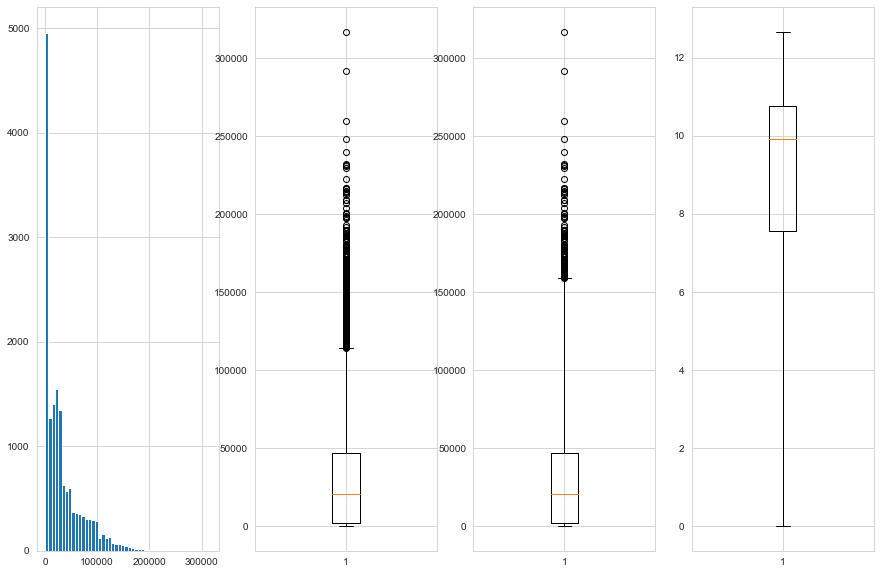

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(df.km, bins = 50)

plt.subplot(142)
plt.boxplot(df.km)

plt.subplot(143)
plt.boxplot(df.km, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(df.km), whis = 2.5)
plt.show()

In [14]:
df.Paint_Type.value_counts(dropna = False)

Metallic       15250
Uni/basic        637
Perl effect       32
Name: Paint_Type, dtype: int64

In [15]:
df.drop("Paint_Type", axis = 1, inplace = True)

In [16]:
df.Body_Color.value_counts(dropna = False)

Black     3901
Grey      3620
White     3514
Silver    1710
Blue      1515
Red        995
Brown      298
Green      166
Beige      120
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body_Color, dtype: int64

In [17]:
df.drop("Body_Color", axis = 1, inplace = True)

In [18]:
df.cons_comb.sort_values().tail(80)

11432    7.80
8270     7.80
8326     7.80
8319     7.80
8321     7.80
12620    7.90
11221    7.90
11219    7.90
10571    8.00
12654    8.00
10507    8.00
10744    8.00
10548    8.00
3609     8.10
3608     8.10
10515    8.30
3649     8.30
3648     8.30
3595     8.30
3593     8.30
3605     8.30
3610     8.30
3587     8.30
3606     8.30
3590     8.30
3592     8.30
5161     8.30
3604     8.30
3603     8.30
3598     8.30
3602     8.30
3599     8.30
3601     8.30
3600     8.30
3596     8.30
12530    8.60
12422    8.60
10789    8.60
12553    8.60
12054    8.70
10817    8.70
12529    8.70
10771    9.10
13894   10.00
14894   10.00
14895   10.00
14896   10.00
14897   10.00
2801    10.00
14912   10.00
14899   10.00
14900   10.00
14913   10.00
14914   10.00
14915   10.00
14910   10.00
14916   10.00
14917   10.00
14918   10.00
14919   10.00
14920   10.00
14921   10.00
14922   10.00
14923   10.00
14898   10.00
14924   10.00
14925   10.00
14926   10.00
14927   10.00
14908   10.00
14907   10.00
14906 

In [19]:
df.cons_comb.describe()

count   15919.00
mean        4.84
std         0.90
min         3.00
25%         4.10
50%         4.80
75%         5.40
max        11.00
Name: cons_comb, dtype: float64

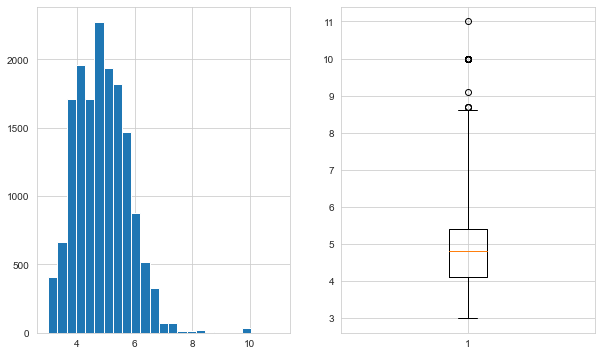

In [20]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(df.cons_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_comb, whis = 2.5)

plt.show()


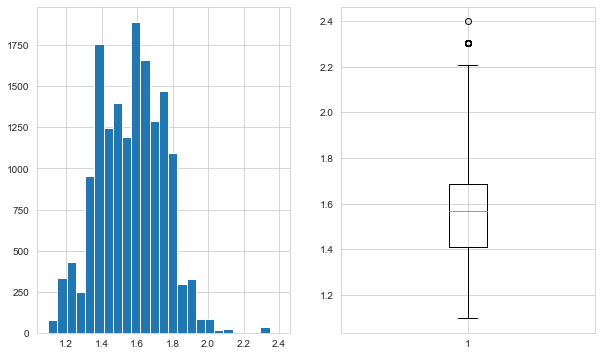

In [21]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(np.log(df.cons_comb), bins = 25)

plt.subplot(122)
plt.boxplot(np.log(df.cons_comb), whis = 2)

plt.show()

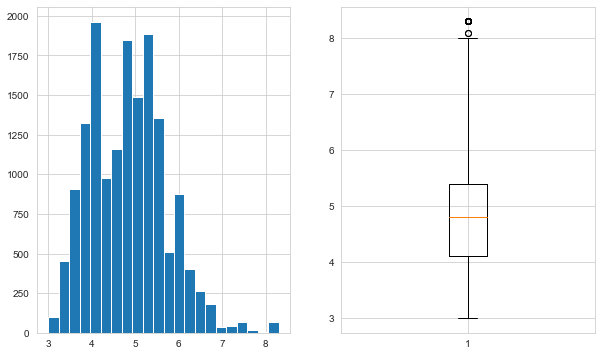

In [22]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(winsorize(df.cons_comb, (0.003)), bins = 22)

plt.subplot(122)
plt.boxplot(winsorize(df.cons_comb, (0.003)), whis = 2)

plt.show()

In [23]:
df.Displacement_cc.value_counts(dropna = False)

1598.00     5042
999.00      2466
1398.00     1334
1399.00      768
1229.00      677
1956.00      670
1461.00      596
1490.00      559
1422.00      467
1197.00      387
898.00       351
1395.00      321
1968.00      301
1149.00      288
1618.00      212
1798.00      210
1498.00      196
1600.00      130
1248.00      110
1997.00      103
1364.00      102
1400.00       90
1200.00       74
998.00        72
1357.00       53
1500.00       50
2000.00       46
1000.00       40
1.00          36
1998.00       25
2480.00       20
1984.00       18
899.00        11
1397.00       11
160.00         6
1499.00        5
929.00         5
139.00         4
997.00         4
1596.00        4
900.00         4
1599.00        3
1396.00        3
1199.00        3
1589.00        2
1300.00        2
2.00           2
995.00         2
1495.00        2
1608.00        2
1856.00        1
1568.00        1
1368.00        1
890.00         1
1239.00        1
1496.00        1
973.00         1
996.00         1
16000.00      

In [24]:
df.Displacement_cc.describe()

count   15919.00
mean     1424.33
std       330.06
min         1.00
25%      1229.00
50%      1461.00
75%      1598.00
max     16000.00
Name: Displacement_cc, dtype: float64

In [25]:
df.sort_values(by = ["Displacement_cc"], ascending = False)["Displacement_cc"].head(5)

10932   16000.00
7169    15898.00
10771    2967.00
3592     2480.00
3609     2480.00
Name: Displacement_cc, dtype: float64

In [26]:
df.sort_values(by = ["Displacement_cc"])["Displacement_cc"].head(55)

12849     1.00
12786     1.00
12783     1.00
12781     1.00
12769     1.00
14321     1.00
12768     1.00
14314     1.00
14315     1.00
14320     1.00
12750     1.00
12670     1.00
14319     1.00
14322     1.00
12604     1.00
13904     1.00
12467     1.00
12554     1.00
12473     1.00
12484     1.00
12501     1.00
12796     1.00
12790     1.00
12499     1.00
14284     1.00
12835     1.00
14326     1.00
14327     1.00
14328     1.00
12798     1.00
12823     1.00
14324     1.00
12800     1.00
12848     1.00
12815     1.00
14325     1.00
14198     2.00
10559     2.00
13912    54.00
10194   122.00
7809    139.00
7812    139.00
7811    139.00
7810    139.00
8128    140.00
15574   160.00
15575   160.00
15576   160.00
15577   160.00
15578   160.00
15579   160.00
13653   890.00
14770   898.00
14768   898.00
14769   898.00
Name: Displacement_cc, dtype: float64

In [27]:
outlier_bool_list = df.Displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [28]:
outlier_bool_list

0        False
1        False
2        False
3        False
4        False
         ...  
15914    False
15915    False
15916    False
15917    False
15918    False
Name: Displacement_cc, Length: 15919, dtype: bool

In [29]:
df.loc[outlier_bool_list, "Displacement_cc"] = np.nan

In [30]:
fill(df, "make_model", "body_type", "Displacement_cc", "median")

Number of NaN :  0
------------------
1598.00    5075
999.00     2466
1398.00    1335
1399.00     772
1229.00     677
1956.00     670
1461.00     596
1490.00     559
1422.00     467
1197.00     387
898.00      351
1395.00     321
1968.00     301
1149.00     288
1618.00     212
1798.00     210
1498.00     196
1600.00     130
1248.00     110
1997.00     103
1364.00     102
1400.00      90
1200.00      89
998.00       72
1357.00      53
1500.00      50
2000.00      46
1000.00      40
1998.00      25
2480.00      20
1984.00      18
899.00       11
1397.00      11
1499.00       5
929.00        5
1596.00       4
997.00        4
900.00        4
1599.00       3
1396.00       3
1199.00       3
1589.00       2
1300.00       2
995.00        2
1608.00       2
1495.00       2
1856.00       1
1686.00       1
1568.00       1
1368.00       1
890.00        1
1239.00       1
1496.00       1
973.00        1
996.00        1
1198.00       1
1238.50       1
1584.00       1
1369.00       1
1333.00       1
13

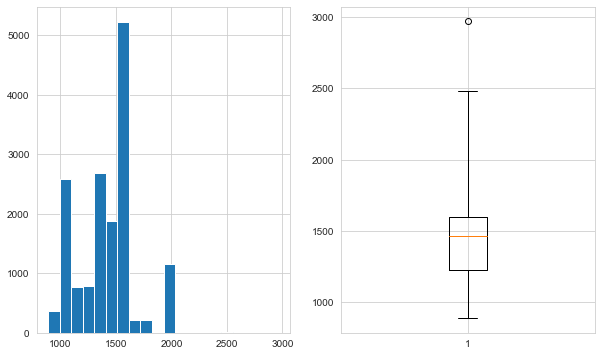

In [31]:

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.Displacement_cc, bins = 20)

plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis = 2.5)

plt.show()

In [32]:
df.Emission_Class.value_counts(dropna = False)

Euro 6    15770
Euro 5       99
Euro 4       50
Name: Emission_Class, dtype: int64

In [33]:
df.drop("Emission_Class", axis=1, inplace=True)

In [34]:
df.Nr_of_Doors.value_counts(dropna = False)

5.00    11729
4.00     3112
3.00      852
2.00      223
1.00        2
7.00        1
Name: Nr_of_Doors, dtype: int64

In [35]:
df.Nr_of_Doors.value_counts(dropna = False)

5.00    11729
4.00     3112
3.00      852
2.00      223
1.00        2
7.00        1
Name: Nr_of_Doors, dtype: int64

In [36]:
fill(df, "make_model", "body_type", "Nr_of_Doors", "mode")

Number of NaN :  0
------------------
5.00    11729
4.00     3112
3.00      852
2.00      223
1.00        2
7.00        1
Name: Nr_of_Doors, dtype: int64


<AxesSubplot:>

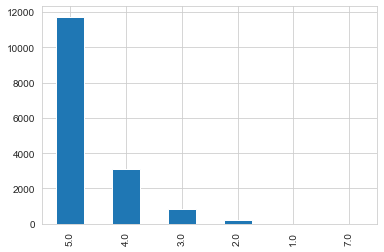

In [37]:
df.Nr_of_Doors.value_counts(dropna = False).plot.bar()

In [38]:
df.Nr_of_Seats.value_counts(dropna = False)

5.00    14179
4.00     1196
7.00      409
2.00      132
6.00        2
3.00        1
Name: Nr_of_Seats, dtype: int64

In [39]:
df.Nr_of_Seats.replace([3, 6], np.nan, inplace=True)

In [40]:
df.Nr_of_Seats.value_counts(dropna = False)

5.00    14179
4.00     1196
7.00      409
2.00      132
NaN         3
Name: Nr_of_Seats, dtype: int64

In [41]:
fill(df, "make_model", "body_type", "Nr_of_Seats", "mode")

Number of NaN :  0
------------------
5.00    14182
4.00     1196
7.00      409
2.00      132
Name: Nr_of_Seats, dtype: int64


<AxesSubplot:>

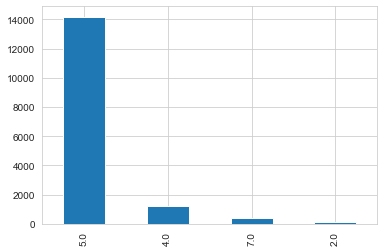

In [42]:
df.Nr_of_Seats.value_counts(dropna = False).plot.bar()

<AxesSubplot:xlabel='make_model,Nr_of_Doors'>

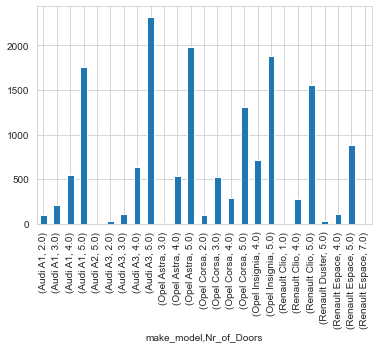

In [43]:
df.groupby(["make_model", "Nr_of_Doors"]).Nr_of_Doors.count().plot.bar()

In [44]:
df.CO2_Emission.value_counts(dropna=False)

120.00    836
104.00    679
106.00    674
114.00    556
99.00     546
97.00     539
139.00    523
124.00    516
10.00     477
117.00    460
103.00    445
123.00    410
98.00     366
108.00    362
107.00    362
119.00    361
129.00    333
133.00    330
128.00    329
118.00    314
110.00    289
126.00    284
85.00     275
127.00    257
111.00    237
113.00    235
109.00    234
140.00    221
135.00    202
105.00    202
9.00      198
130.00    189
150.00    174
143.00    171
11.00     171
95.00     161
116.00    157
141.00    156
118.50    147
136.00    145
137.00    135
125.00    133
134.00    130
145.00    126
149.00    117
153.00    113
147.00    109
101.00    105
13.00     100
115.00     86
1.00       84
121.00     82
138.00     75
93.00      66
14.00      59
168.00     58
90.00      54
131.00     48
148.00     48
154.00     40
144.00     40
94.00      37
100.00     36
146.00     36
151.00     34
186.00     31
91.00      31
15.00      28
187.00     26
8.00       25
17.00      25
96.00 

In [45]:
df.CO2_Emission.sort_values().head(50)

8217    0.00
10566   0.00
7210    1.00
7155    1.00
7154    1.00
7114    1.00
12905   1.00
6607    1.00
5913    1.00
5909    1.00
6577    1.00
5994    1.00
5888    1.00
5887    1.00
5886    1.00
5885    1.00
5883    1.00
6017    1.00
6026    1.00
6046    1.00
5863    1.00
5826    1.00
6708    1.00
5819    1.00
3669    1.00
6047    1.00
10965   1.00
5811    1.00
7214    1.00
6050    1.00
7802    1.00
7216    1.00
6679    1.00
7487    1.00
6675    1.00
5971    1.00
5970    1.00
7495    1.00
6674    1.00
5965    1.00
5960    1.00
6672    1.00
6667    1.00
6662    1.00
5948    1.00
7569    1.00
7621    1.00
4023    1.00
5941    1.00
4016    1.00
Name: CO2_Emission, dtype: float64

In [46]:
df.drop("CO2_Emission", axis=1, inplace=True)

In [47]:
df["Weight_kg"].value_counts(dropna=False)

1163.00    1547
1350.00    1147
1613.00     931
1195.00     712
1180.00     694
1393.00     675
1308.00     667
1503.00     554
1335.00     411
1691.00     377
1360.00     356
1162.00     344
1090.00     306
1165.00     301
1135.00     213
1199.00     205
1734.00     177
1325.00     136
1355.00     135
1280.00     127
1260.00     127
1175.00     118
1275.00     112
1487.00     110
1278.00     110
1425.00     109
1255.00     108
1200.00     107
1273.00     104
1522.00     103
1403.00      91
1120.00      90
1659.00      89
1701.00      87
1250.00      85
1441.00      82
1285.00      80
1110.00      75
1279.00      72
1364.00      70
1345.00      67
1733.00      65
1141.00      64
1685.00      64
1071.00      64
1230.00      63
1845.00      56
1205.00      53
1052.00      53
1154.00      52
1664.00      52
1513.00      51
1065.00      50
1237.00      49
1088.00      46
1119.00      46
1440.00      46
1265.00      45
1395.00      44
1209.00      43
1585.00      43
1666.00      43
1134.00 

In [48]:
df.drop("Weight_kg", axis=1, inplace=True)

In [49]:
df.hp_kW.sort_values().head(50)

6034     1.00
7019     1.00
7014     1.00
9285     1.00
6005     1.00
9287     1.00
9288     1.00
7018     1.00
9289     1.00
9290     1.00
9292     1.00
9299     1.00
10610    1.00
10580    1.00
10579    1.00
10468    1.00
15155    1.00
15156    1.00
6946     1.00
7016     1.00
13885    4.00
3913     9.00
8857    40.00
13759   40.00
8408    44.00
10284   51.00
10285   51.00
10286   51.00
10287   51.00
9145    51.00
10288   51.00
10347   51.00
10346   51.00
10345   51.00
10283   51.00
10331   51.00
9025    51.00
10289   51.00
10290   51.00
10342   51.00
9159    51.00
9158    51.00
10291   51.00
10292   51.00
10294   51.00
9026    51.00
10282   51.00
10281   51.00
10280   51.00
10266   51.00
Name: hp_kW, dtype: float64

In [50]:
df.hp_kW.unique()

array([ 66., 141.,  85.,  70.,  92., 112.,  60.,  71.,  67., 110.,  93.,
       147.,  86., 140.,  87.,  81.,  82., 135., 132., 100.,  96., 162.,
       150., 294., 228., 270., 137.,   9., 133.,  77., 101.,  78., 103.,
         1.,  74., 118.,  84.,  88.,  80.,  76., 149.,  55.,  44.,  51.,
        52.,  63.,  40.,  65.,  75., 125., 120., 184., 239., 121., 143.,
       191.,  89., 195., 127., 122., 154., 155., 104., 123., 146.,  90.,
        56.,  53.,  54., 164.,   4., 163.,  57., 119., 165., 117., 115.,
        98., 168., 167.])

In [51]:
df.hp_kW.loc[df.hp_kW < 40] = np.nan

In [52]:
df.hp_kW.isnull().sum()

22

In [53]:
fill(df, "make_model", "body_type", "hp_kW", "median")

Number of NaN :  0
------------------
85.00     2544
66.00     2124
81.00     1408
100.00    1311
110.00    1112
70.00      890
125.00     707
51.00      695
55.00      577
118.00     552
92.00      466
121.00     400
147.00     380
77.00      353
56.00      315
54.00      276
103.00     259
87.00      232
165.00     194
88.00      177
60.00      160
162.00      98
74.00       81
96.00       72
71.00       59
101.00      47
67.00       40
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
82.00       22
52.00       22
78.00       20
146.00      18
294.00      18
141.00      16
57.00       10
120.00       8
104.00       8
191.00       7
112.00       7
155.00       6
117.00       6
184.00       5
90.00        4
65.00        4
76.00        4
98.00        3
80.00        3
93.00        3
149.00       3
168.00       3
40.00        2
86.00        2
53.00        2
228.00       2
167.00       2
143.00       2
150.00       2
63.00        2
140.00       2
89.00        2
12

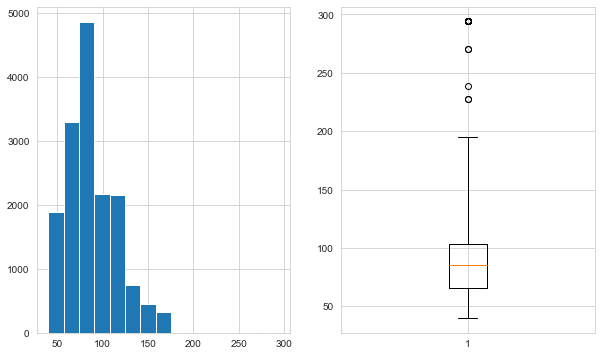

In [54]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.hp_kW, bins=15)

plt.subplot(122)
plt.boxplot(df.hp_kW, whis=2.5)

plt.show()


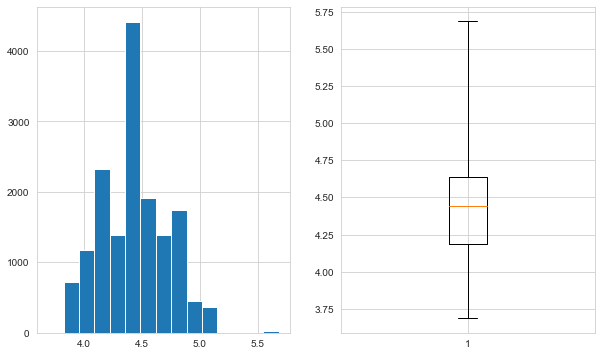

In [55]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(np.log(df.hp_kW), bins=15)

plt.subplot(122)
plt.boxplot(np.log(df.hp_kW), whis=2.5)

plt.show()

In [56]:
df.price.describe()

count   15919.00
mean    18019.90
std      7386.17
min        13.00
25%     12850.00
50%     16900.00
75%     21900.00
max     74600.00
Name: price, dtype: float64

In [57]:
df.price.sort_values().head(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: price, dtype: int64

In [58]:
df.drop(index = [8594, 8828, 6066,8829], axis = 0, inplace = True)

In [59]:
df.shape

(15915, 121)

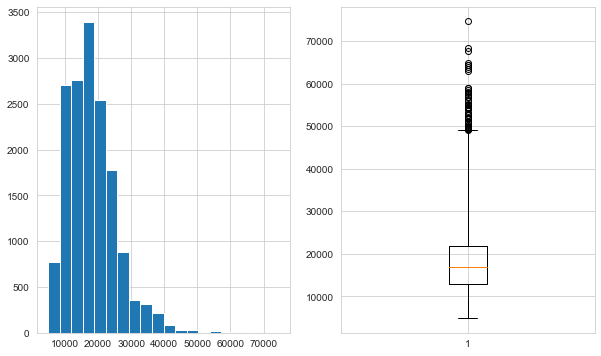

In [60]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()


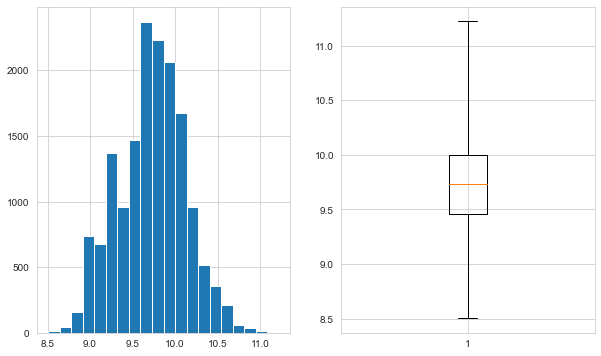

In [61]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(np.log(df.price), bins=20)

plt.subplot(122)
plt.boxplot(np.log(df.price), whis=2.3)

plt.show()

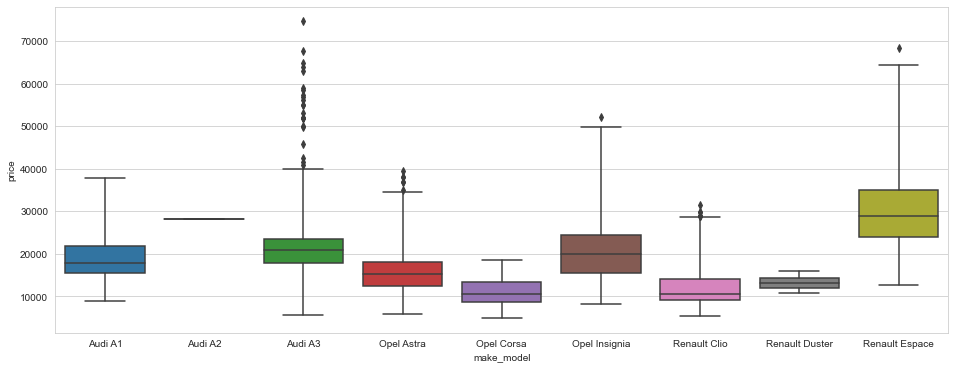

In [62]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

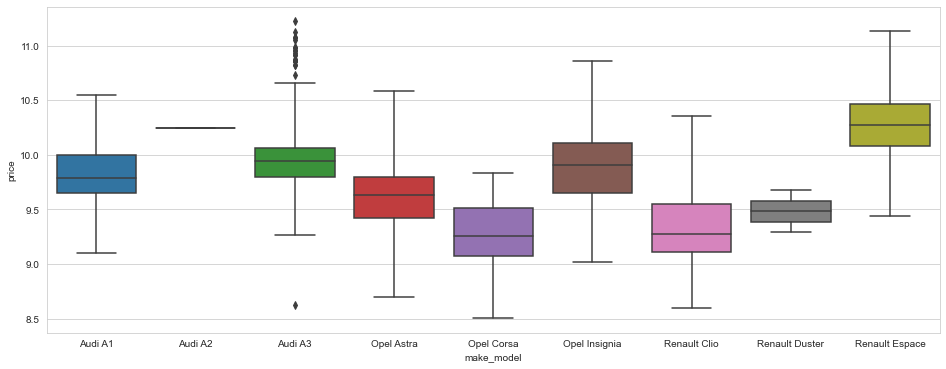

In [63]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y=np.log(df.price), data=df, whis=2.3)
plt.show()

In [64]:

df.head()

,Unnamed: 0,Unnamed: 0.1,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort&Convenience,Entertainment&Media,Extras,Safety&Security,Previous_Owners,hp_kW,Inspection_new,age,Upholstery_type,Nr_of_Doors,Nr_of_Seats,Gearing_Type,Displacement_cc,Drive_chain,cons_comb,cons_city,cons_country,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,...,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
0,0,0,Audi A1,Sedans,15770,VAT deductible,56013.00,Used,Diesel,6.00,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system","Bluetooth,Hands-free equipment,On-board computer,Radio","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",2.00,66.00,1,3.00,Cloth,5.00,5.00,Automatic,1422.00,front,3.80,4.30,3.50,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,1,Audi A1,Sedans,14500,Price negotiable,80000.00,Used,Benzine,7.00,"Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Parking assist system sensors rear,Power windows,Start-stop system,Tinted windows","Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system","Alloy wheels,Sport seats,Sport suspension,Voice Control","ABS,Central door lock,Central door lock with remote control,Daytime running lights,Driver-side airbag,Electronic stability control,Head airbag,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",1.00,141.00,0,2.00,Cloth,3.00,4.00,Automatic,1798.00,front,5.60,7.10,4.70,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,2,2,Audi A1,Sedans,14640,VAT deductible,83450.00,Used,Diesel,6.00,"Air conditioning,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Seat heating,Start-stop system","MP3,On-board computer","Alloy wheels,Voice Co

In [65]:
numeric_col = "price,km,Gears,Previous_Owners,cons_comb,Displacement_cc,age,hp_kW".split(",")

In [66]:
df_corr = df[numeric_col]

In [67]:
df_corr

,price,km,Gears,Previous_Owners,cons_comb,Displacement_cc,age,hp_kW
0,15770,56013.00,6.00,2.00,3.80,1422.00,3.00,66.00
1,14500,80000.00,7.00,1.00,5.60,1798.00,2.00,141.00
2,14640,83450.00,6.00,1.00,3.80,1598.00,3.00,85.00
3,14500,73000.00,6.00,1.00,3.80,1422.00,3.00,66.00
4,16790,16200.00,6.00,1.00,4.10,1422.00,3.00,66.00
...,...,...,...,...,...,...,...,...
15914,39950,1833.26,6.00,1.00,5.30,1997.00,0.00,147.00
15915,39885,9900.00,7.00,1.00,7.40,1798.00,0.00,165.00
15916,39875,15.00,6.00,1.00,5.30,1997.00,0.00,146.00
15917,39700,10.00,6.00,1.00,5.30,1997.00,0.00,147.00


<AxesSubplot:>

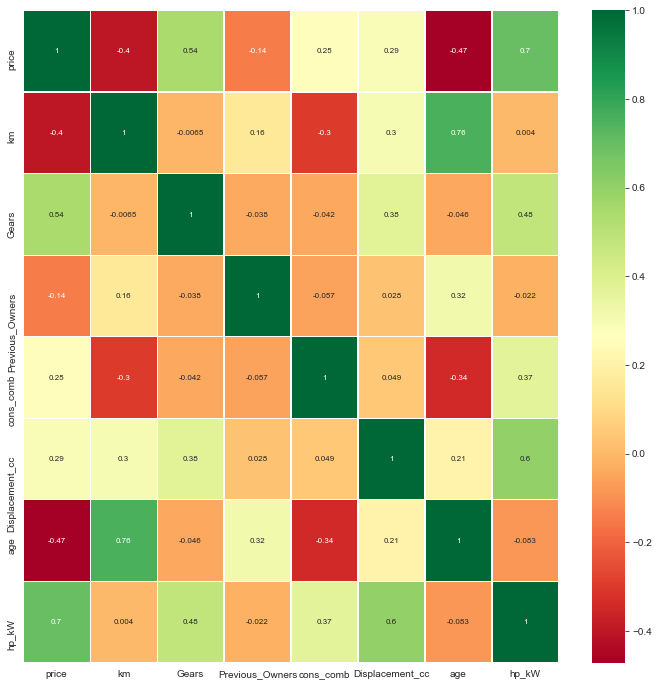

In [68]:
plt.figure(figsize = (12,12))
sns.heatmap(df_corr.corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 8})

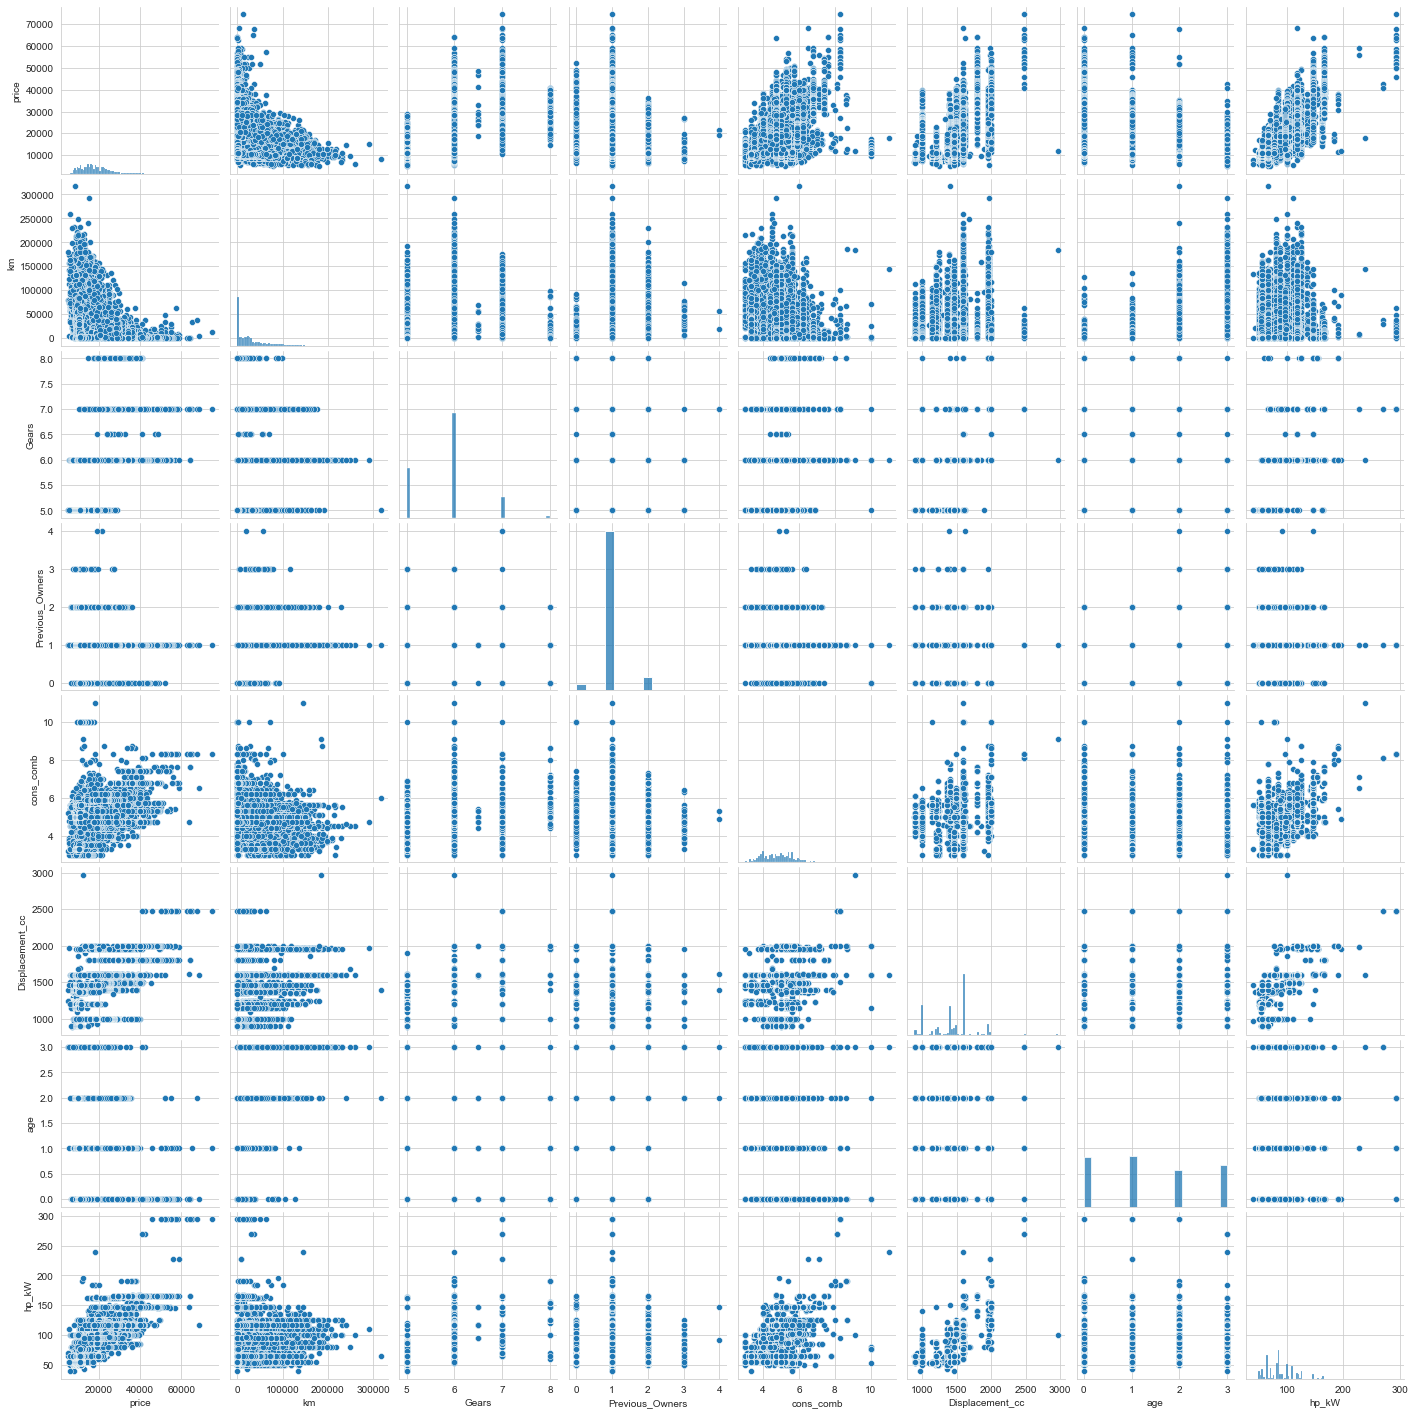

In [69]:
sns.pairplot(df[numeric_col], size = 2.5)
plt.show()

In [70]:
df_final = pd.get_dummies(df)

In [71]:
df_final.head()

,Unnamed: 0,Unnamed: 0.1,price,km,Gears,Previous_Owners,hp_kW,Inspection_new,age,Nr_of_Doors,Nr_of_Seats,Displacement_cc,cons_comb,cons_city,cons_country,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,...,"Safety&Security_Electronic stability control,Isofix,Lane departure warning system,LED Headlights,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition","Safety&Security_Electronic stability control,Isofix,Power steering,Tire pressure monitoring system","Safety&Security_Electronic stability control,Lane departure warning system,Tire pressure monitoring system,Traction control","Safety&Security_Electronic stability control,Power steering","Safety&Security_Electronic stability control,Power steering,Traction control","Safety&Security_Electronic stability control,Power steering,Traction control,Xenon headlights","Safety&Security_Electronic stability control,Traction control","Safety&Security_Emergency brake assistant,Fog lights,Isofix,Tire pressure monitoring system,Traction control",Safety&Security_Fog lights,"Safety&Security_Fog lights,Immobilizer,Isofix","Safety&Security_Fog lights,Immobilizer,LED Headlights,Power steering,Traction control","Safety&Security_Fog lights,Immobilizer,Power steering,Traction control,Xenon headlights","Safety&Security_Fog lights,Isofix","Safety&Security_Fog lights,Isofix,LED Headlights,Tire pressure monitoring system,Traction control,Xenon headlights","Safety&Security_Fog lights,Isofix,Power steering","Safety&Security_Fog lights,Isofix,Tire pressure monitoring system,Traction control","Safety&Security_Fog lights,LED Daytime Running Lights,Power steering","Safety&Security_Fog lights,Lane departure warning system","Safety&Security_Fog lights,Power steering",Safety&Security_Immobilizer,"Safety&Security_Immobilizer,Isofix","Safety&Security_Immobilizer,Isofix,Passenger-side airbag,Traction control","Safety&Security_Immobilizer,Isofix,Power steering,Side airbag","Safety&Security_Immobilizer,LED Headlights","Safety&Security_Immobilizer,Lane departure warning system,LED Headlights","Safety&Security_Immobilizer,Lane departure warning system,Traffic sign recognition","Safety&Security_Immobilizer,Power steering",Safety&Security_Isofix,"Safety&Security_Isofix,Power steering","Safety&Security_Isofix,Power steering,Traction control","Safety&Security_Isofix,Power steering,Xenon headlights","Safety&Security_Isofix,Tire pressure monitoring system","Safety&Security_Isofix,Tire pressure monitoring system,Xenon headlights","Safety&Security_Isofix,Traction control",Safety&Security_LED Headlights,"Safety&Security_LED Headlights,Power steering","Safety&Security_Lane departure warning system,Traffic sign recognition","Safety&Security_Passenger-side airbag,Side airbag",Safety&Security_Power steering,Safety&Security_Side airbag,Safety&Security_Tire pressure monitoring system,Safety&Security_Xenon headlights,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
0,0,0,15770,56013.00,6.00,2.00,66.00,1,3.00,5.00,5.00,1422.00,3.80,4.30,3.50,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0

In [72]:
df_final.to_csv("EDA_final_scout.csv", index=False)